In [1]:
import simexpal
import yaml
import matplotlib.pyplot as plt

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

for r in sorted(results, key=lambda r: (r['max_fill'], r['algo'])):
    print('Algorithm {}, max fill {} takes: {} ms'.format(
          r['algo'], r['max_fill'], r['time']))

Algorithm dynamic, max fill 0.5 takes: 22125 ms
Algorithm dynamic scaling, max fill 0.5 takes: 22533 ms
Algorithm static, max fill 0.5 takes: 13799 ms
Algorithm stl, max fill 0.5 takes: 59492 ms
Algorithm dynamic, max fill 0.8 takes: 21681 ms
Algorithm dynamic scaling, max fill 0.8 takes: 22208 ms
Algorithm static, max fill 0.8 takes: 13802 ms
Algorithm stl, max fill 0.8 takes: 59186 ms
Algorithm dynamic, max fill 0.9 takes: 21831 ms
Algorithm dynamic scaling, max fill 0.9 takes: 21833 ms
Algorithm static, max fill 0.9 takes: 13858 ms
Algorithm stl, max fill 0.9 takes: 59320 ms
Algorithm subtables_hashing, max fill 0.9 takes: 22154 ms
Algorithm subtables_hashing, max fill 0.9 takes: 22044 ms
Algorithm subtables_hashing, max fill 0.9 takes: 22101 ms
Algorithm subtables_hashing, max fill 0.9 takes: 21968 ms
Algorithm subtables_hashing, max fill 0.9 takes: 21739 ms
Algorithm subtables_hashing, max fill 0.9 takes: 21875 ms
Algorithm dynamic, max fill 0.95 takes: 21678 ms
Algorithm dynamic 

In [2]:
# dynamic

factors = {}
times = {}
algorithms = set()
for r in sorted(results, key=lambda r: (r['max_fill'], r['algo'])):
    alg = r['algo']
    if alg == 'subtables_hashing':
        continue
    if alg not in algorithms:
        algorithms.add(alg)
        factors[alg] = []
        times[alg] = []
    factors[alg].append(r['max_fill'])
    times[alg].append(r['time'])

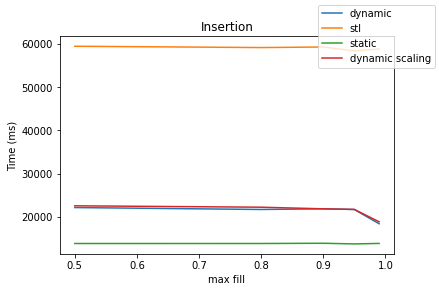

In [3]:
fig, plts = plt.subplots()
for alg in algorithms:
    plts.plot(factors[alg], times[alg])
fig.legend(algorithms)
plts.set_title('Insertion')
plts.set_ylabel('Time (ms)')
plts.set_xlabel('max fill')
fig.savefig('plot_4b.pdf', bbox_inches='tight')

In [7]:
#subtables

tables = []
times = []

def filterFunc(r):
  if r['algo'] == 'subtables_hashing':
    return True
  else:
    return False

sub_results = filter(filterFunc, results)

for r in sorted(sub_results, key=lambda r: (r['num_tables'])):
    tables.append(r['num_tables'])
    times.append(r['time'])

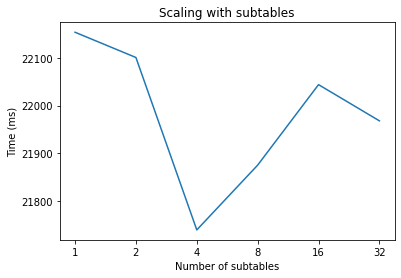

In [8]:
fig, plts = plt.subplots()

plts.plot(tables, times)
plts.set_title('Scaling with subtables')
plts.set_ylabel('Time (ms)')
plts.set_xscale('log', base=2)
plts.set_xticks([1, 2, 4, 8, 16, 32])
plts.set_xticklabels([1, 2, 4, 8, 16, 32])
plts.set_xlabel('Number of subtables')
fig.savefig('plot_4c.pdf', bbox_inches='tight')